In [12]:
import xarray 
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy.io.img_tiles as cimgt

In [13]:
dat = '20191003'
dat1 = '2019-10-03-03600'
dat2 = '2019-10-04-03600'
workdir = '/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/'
p3file = f'CAMP2Ex-mrg01-P3B-NC_merge_{dat}_R3.nc'
p3data_ds = xarray.open_dataset(workdir+p3file)

In [14]:
variables = ['MLH', 'CO','Org_Ave_IsoK_STP', 'mz42_Ave_IsoK_STP', 'mz43_Ave_IsoK_STP', 'mz44_Ave_IsoK_STP', 'mz60_Ave_IsoK_STP','Total_Air_Temp','Static_Pressure']
selected_data = p3data_ds[variables]
p3data = selected_data.to_dataframe().reset_index()

In [15]:
p3data['mz42_Ave_ppbv'] = (1e9*p3data['mz42_Ave_IsoK_STP']/(1000*1E6*1.225)) * (28.97/41.05)
p3data['mz42_Ave_ppbv_CO_EnR'] = p3data['mz42_Ave_ppbv'] / p3data['CO']

In [16]:
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cf

import numpy as np
# Use OpenStreetMap Tiles
osm_tiles = cimgt.OSM()
def plot_background(ax):
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor="None",edgecolor="k", linewidth=1)
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor = 'None', edgecolor='k')

ylo = 5#p3data['lat'].min()-0.25
yhi = 19#p3data['lat'].max()+0.25
xlo = 115#p3data['lon'].min()-0.25
xhi = 127#p3data['lon'].max()+0.25

def plot_ticks(ax):
    ax.set_yticks(np.arange(ylo,yhi,1), crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(xlo,xhi,1), crs = ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_formatter(LongitudeFormatter())

def plot_ticks_zoom(ax):
    ax.set_yticks(np.arange(ylo,yhi,0.2), crs = ccrs.PlateCarree())
    ax.set_xticks(np.arange(xlo,xhi,0.2), crs = ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_formatter(LongitudeFormatter())

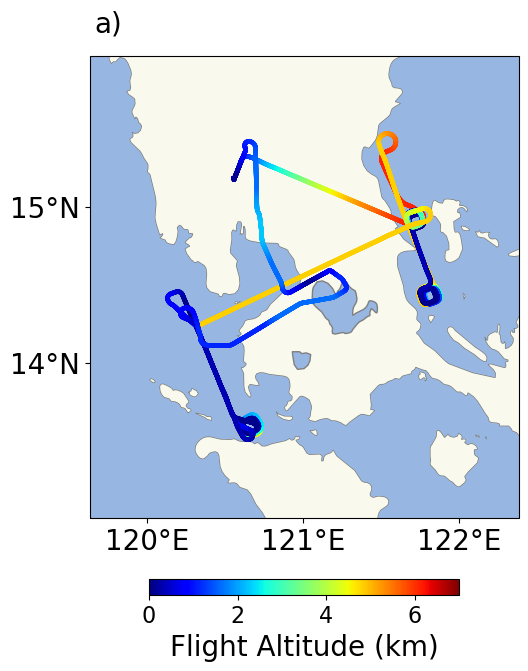

In [26]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np

extent = [ylo, yhi, xlo, xhi]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(8, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

resol = '10m'  # use data at this scale
bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
   scale=resol, edgecolor='gray', facecolor=cfeature.COLORS['water'])
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')

ax.add_feature(land, facecolor='beige', alpha=0.5, zorder=0)
ax.add_feature(ocean, linewidth=0.2 , zorder=0)
ax.add_feature(lakes,zorder=0.5)
ax.add_feature(rivers, linewidth=0.5)
ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)

ax.text(0.01, 1.1, 'a)', transform=ax.transAxes, fontsize=20, va='top', ha='left')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.plot(p3data['lon'], p3data['lat'], linewidth=0.5, transform=ccrs.PlateCarree(), color='k', alpha=0.5,  label='Flight Track',zorder=1)
sc = ax.scatter(p3data['lon'], p3data['lat'], c= p3data['alt']/1000, vmin=0, vmax=7, s=5, marker='o', cmap='jet',transform=ccrs.PlateCarree())


cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.1, shrink=0.5)
cbar.set_label('Flight Altitude (km)',fontsize=20)
cbar.ax.tick_params(labelsize=16)      
plot_ticks(ax)


ax.set_ylim(p3data['lat'].min()-0.5,p3data['lat'].max()+0.5 )
ax.set_xlim(p3data['lon'].min()-0.5,p3data['lon'].max()+0.5 )
plt.savefig(f'img/Figure13a_AMSPaper.png',dpi=300, bbox_inches='tight')




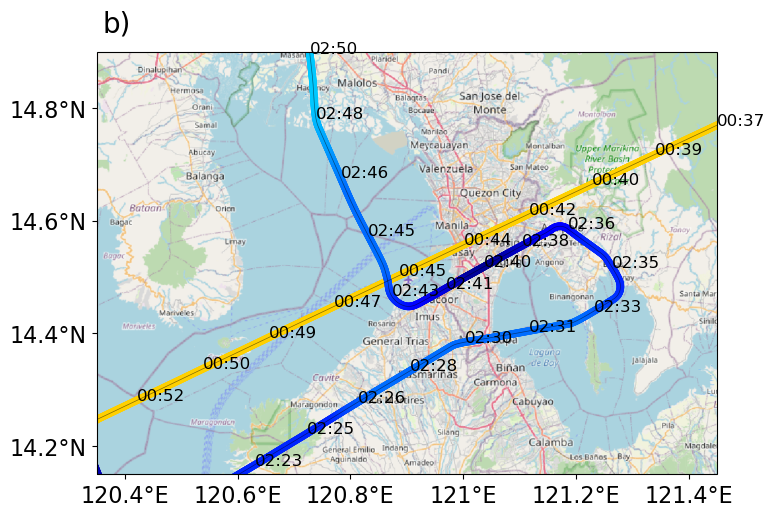

In [29]:

extent = [14.2, 14.8, 120.3, 121.3]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(8, 6))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

# Use OpenStreetMap Tiles
osm_tiles = cimgt.OSM()

resol = '10m'  # use data at this scale
bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cartopy.feature.NaturalEarthFeature('physical', 'lakes', \
    scale=resol, edgecolor='gray', facecolor=cfeature.COLORS['water'])
rivers = cartopy.feature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')

ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)
ax.add_image(osm_tiles, 10)
ax.plot(p3data['lon'], p3data['lat'], linewidth=0.5, transform=ccrs.PlateCarree(), color='k', alpha=0.5,  label='Flight Track')

ax.text(0.01, 1.1, 'b)', transform=ax.transAxes, fontsize=20, va='top', ha='left')
sc = ax.scatter(p3data['lon'], p3data['lat'], c= p3data['alt']/1000, vmin=0, vmax=7, s=20, marker='o', cmap='jet',transform=ccrs.PlateCarree())
p3data_ = p3data[(p3data['lon']>120.35) & (p3data['lon']<121.45) & (p3data['lat']>14.15) & (p3data['lat']<14.9)]
lons = p3data_['lon'].values
lats = p3data_['lat'].values
datetimes = p3data_['time'].values
#for i in range(0, len(lons), 500):
for i in range(0, len(lons), 100):
    dt = pd.to_datetime(datetimes[i])  # convert numpy.datetime64 to pandas.Timestamp
    ax.text(lons[i], lats[i], dt.strftime('%H:%M'), fontsize=12, transform=ccrs.PlateCarree())

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plot_ticks_zoom(ax)
#plt.title("RF 18:Manila Plume", fontsize=15)

ax.set_ylim(14.15,14.9 )
ax.set_xlim(120.35, 121.45)
plt.savefig(f'img/Figure13b_AMSPaper.png',dpi=300, bbox_inches='tight')


